In [1]:
import numpy as np
import math

In [2]:
def AND(x1,x2):
    w1=0.5
    w2=0.5
    y= x1*w1+x2*w2
    if y>=0.7:
        return 1
    else:
        return 0 

In [3]:
def NPAND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5, 0.5])
    b= 0.7
    y=np.sum(w*x)-b
    if y>0:
        return 1 
    else:
        return 0 


In [4]:
X=[(0,0),(0,1),(1,0),(1,1)]

In [5]:
for Xs in X:
    y = NPAND(Xs[0]*0.8,Xs[1]*0.8)
    print(Xs,'->',y)

(0, 0) -> 0
(0, 1) -> 0
(1, 0) -> 0
(1, 1) -> 1


In [6]:
def NPOR(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b=0.2
    y=np.sum(w*x)-b
    if y<=0:
        return 0
    else:
        return 1


In [7]:
for Xs in X:
    y = NPOR(Xs[0],Xs[1]*0.5)
    print(Xs,'->',y)

(0, 0) -> 0
(0, 1) -> 1
(1, 0) -> 1
(1, 1) -> 1


In [8]:
def NPNOR(x1,x2):
    x = np.array([x1,x2])
    w = np.array(0.5)
    b=0.4
    y=np.sum(w*x)-b
    if y>0:
        return 0 
    else:
        return 1


In [9]:
for Xs in X:
    y = NPNOR(Xs[0],Xs[1])
    print(Xs,'->',y)

(0, 0) -> 1
(0, 1) -> 0
(1, 0) -> 0
(1, 1) -> 0


In [10]:
def NPNAND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5, 0.5])
    b= 0.7
    y=np.sum(w*x)-b
    if y>0:
        return 0
    else:
        return 1

In [11]:
for Xs in X:
    y = NPNAND(Xs[0],Xs[1])
    print(Xs,'->',y)

(0, 0) -> 1
(0, 1) -> 1
(1, 0) -> 1
(1, 1) -> 0


In [12]:
def NPXOR(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5, 0.5])
    b=0.3
    y = np.sum(-(w*(x-b))**2+b**2)
    print(y)
    if y>b**2:
        return 1 
    else:
        return 0

In [13]:
for Xs in X:
    y = NPXOR(Xs[0]*0.8,Xs[1]*0.8)
    print(Xs,'->',y)

0.135
(0, 0) -> 1
0.095
(0, 1) -> 1
0.095
(1, 0) -> 1
0.05499999999999999
(1, 1) -> 0


In [14]:
def step_function(x):
    print(x)
    if x== 0:
        return 0
    else:
        y= x**2/x
    if y>0:
        return 1
    else:
        return 0

In [15]:
def step_function(x):
    return (x>0).astype(int)

In [16]:
import random

In [17]:
X=np.array(range(-1,2))

In [18]:
step_function(X)

array([0, 0, 1])

In [19]:
def sigmoid(x):
    y=1/(1+np.exp(-x))
    return y

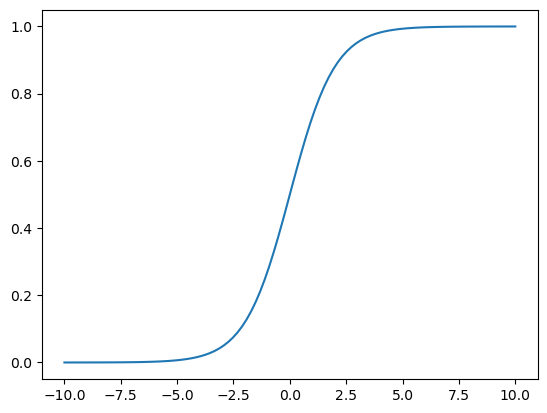

In [20]:
import matplotlib.pyplot as plt 
x=np.linspace(-10,10,100)
plt.plot(x, sigmoid(x))

In [21]:
def relu(x):
    y=np.maximum(0,x)
    return y

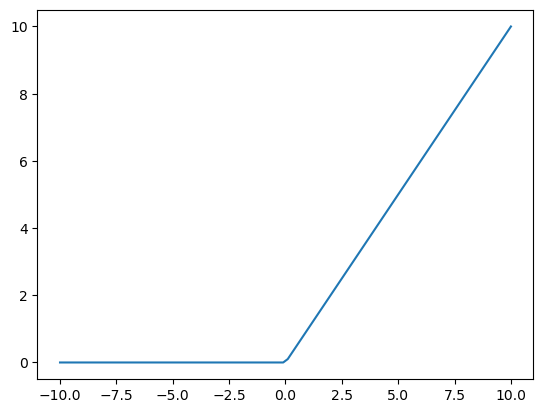

In [22]:
import matplotlib.pyplot as plt 
x=np.linspace(-10,10,100)
plt.plot(x, relu(x))

In [23]:
def hyperT(x):
    return (np.exp(2*x)-1)/(np.exp(2*x)+1)

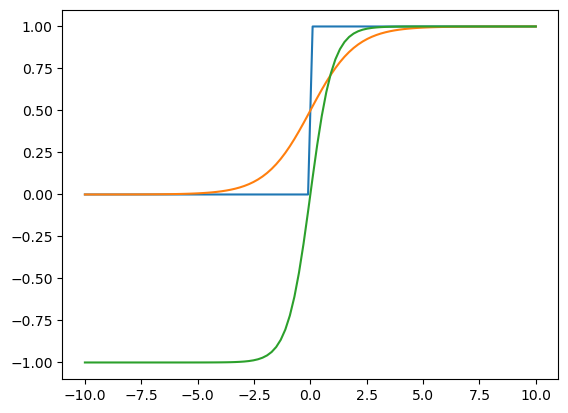

In [24]:
import matplotlib.pyplot as plt 

x=np.linspace(-10,10,100)
plt.plot(x,step_function(x))
plt.plot(x,sigmoid(x))
plt.plot(x,hyperT(x))
plt.show()

In [25]:
def same(x):
    return x

In [26]:
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

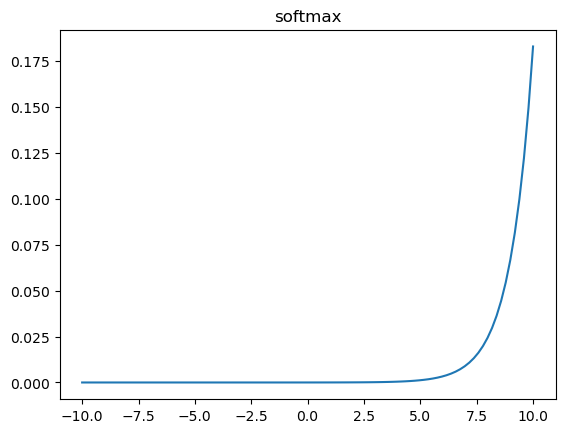

In [27]:

x=np.linspace(-10,10,100)
y=softmax(x)
plt.plot(x,y)
plt.title(f"softmax")
plt.show()

In [28]:
import numpy as np 
import matplotlib.pyplot as plt

In [29]:
x1 = random.randrange(60,100)
x2 = random.randrange(60,100)

In [2456]:
def neural():
    network = {}
    network['w1'] = np.array([[0.1,0.2,0.3],[0.4,0.5,0.6]]) 
    network['b1'] = np.array([0.1,0.2,0.2])
    network['w2'] = np.array([[0.4,0.5],[0.3,0.2],[0.4,0.3]])
    network['b2'] = np.array([0.3,0.4])
    network['w3'] = np.array([0.3,0.6])
    network['b3'] = np.array([0.3])
    return network
def forward(net,x):
    w=[]
    b=[]
    for i in range(1,4):
        w.append(net[f'w{i}'])
        b.append(net[f'b{i}'])
    w1,w2,w3=w

    b1,b2,b3=b
    a1 = np.dot(x,w1)+b1
    z1 = sigmoid(a1)
   
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,w3)+b3
    z3 = relu(a3)
    y = same(z3)
 
    return y
loss_G=[]
i=0
def optimaitizer(target, output, i = i):
    i+=1

    return np.sum((output-target)**2)/len(output)
target = 0.85
def loss(x, t = target):
    y = forward(network, x)
    if len(loss_G) == 0 : 
        loss = optimaitizer(t, y)
    else:
        gen = loss_G.pop(0)
        loss = optimaitizer(t, y)*0.1+gen*0.9 
    loss_G.append(loss)  
    return loss 

network = neural()


In [2462]:

output = forward(network, input)
print(output) #[1.0219655]
target = 0.85
if output>target:
    network['w1'] -=loss(input)
    network['b1'] -=loss(input)
    network['w2'] -=loss(input)
    network['b2'] -=loss(input)
    network['w3'] -=loss(input)
    network['b3'] -=loss(input)
else:
    network['w1'] +=loss(input)
    network['b1'] +=loss(input)
    network['w2'] +=loss(input)
    network['b2'] +=loss(input)
    network['w3'] +=loss(input)
    network['b3'] +=loss(input)

input = np.array([60,90])
output = forward(network, input)
print(output) #[1.0219655]


1
[0.85165165]
1
[3.77029476e-10 4.61436094e-10 5.64739054e-10 6.91168729e-10
 8.45902561e-10 1.03527708e-09 1.26704739e-09 1.55070475e-09
 1.89786526e-09 2.32274554e-09 2.84274493e-09 3.47915801e-09
 4.25804662e-09 5.21130715e-09 6.37797672e-09 7.80583179e-09
 9.55334469e-09 1.16920781e-08 1.43096155e-08 1.75131483e-08
 2.14338646e-08 2.62323225e-08 3.21050242e-08 3.92924637e-08
 4.80889749e-08 5.88547851e-08 7.20307667e-08 8.81564912e-08
 1.07892326e-07 1.32046476e-07 1.61608081e-07 1.97787724e-07
 2.42067002e-07 2.96259203e-07 3.62583560e-07 4.43756133e-07
 5.43101031e-07 6.64686542e-07 8.13491735e-07 9.95610352e-07
 1.21850036e-06 1.49128937e-06 1.82514839e-06 2.23374935e-06
 2.73382492e-06 3.34585378e-06 4.09489921e-06 5.01163548e-06
 6.13360401e-06 7.50675071e-06 9.18730750e-06 1.12440951e-05
 1.37613414e-05 1.68421305e-05 2.06126243e-05 2.52272289e-05
 3.08749175e-05 3.77869697e-05 4.62464418e-05 5.65997592e-05
 6.92709019e-05 8.47787680e-05 1.03758422e-04 1.26987104e-04
 1.5541

In [2338]:
print(    network['w1'],
    network['b1'] ,
    network['w2'] ,
    network['b2'] ,
    network['w3'] ,
    network['b3'])

[[0.03334963 0.13334963 0.23334963]
 [0.33334963 0.43334963 0.53334963]] [0.03630152 0.13630152 0.13630152] [[0.33895826 0.43895826]
 [0.23895826 0.13895826]
 [0.33895826 0.23895826]] [0.24195151 0.34195151] [0.24483337 0.54483337] [0.24896934]


In [2376]:
input = np.random.randint(0,100,2)
print(input)
output = forward(network, input)
print(output) #[1.0219655]

[26  3]
1
[0.84209526]


In [1507]:
p=[1,2]

In [1510]:
x=p.pop(0)

In [1511]:
x

1

In [32]:
x= np.array([60, 70])

In [33]:
network=neural()

In [34]:
print(foroward(network,x))

[array([[0.1, 0.2, 0.3],
       [0.4, 0.5, 0.6]]), array([[0.4, 0.5],
       [0.3, 0.2],
       [0.4, 0.3]]), array([0.3, 0.6])] [array([0.1, 0.2, 0.2]), array([0.3, 0.4]), array([0.3])]
[34.1 47.2 60.2] <class 'numpy.ndarray'>
[1.0219655]


In [2305]:
!pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.4 MB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.5/385.2 MB 15.5 MB/s eta 0:00:25
   ---------------------------------------- 1.1/385.2 MB 13.9 MB/s eta 0:00:28
   ---------------------------------------- 1.

In [2377]:
!pip install keras

In [6]:
import numpy as np 
import tensorflow as tf

In [2402]:
t0=tf.constant(1)#0차원
t1=tf.constant([1,2,3,1,2,3]) #1ckdnjs
t2 = tf.constant([[1,2,3,4],[1,2,3,4]])
t3 = tf.constant([[[2,2,3],[2,3,2],[1,2,2]]])
tf.rank(t3) # 3차원

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [2405]:
t1_Var = tf.Variable([1,2,3])
t1_Var

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3])>

In [2409]:
seq_t1 = tf.linspace(1, 10, 30)
seq_t1

<tf.Tensor: shape=(30,), dtype=float64, numpy=
array([ 1.        ,  1.31034483,  1.62068966,  1.93103448,  2.24137931,
        2.55172414,  2.86206897,  3.17241379,  3.48275862,  3.79310345,
        4.10344828,  4.4137931 ,  4.72413793,  5.03448276,  5.34482759,
        5.65517241,  5.96551724,  6.27586207,  6.5862069 ,  6.89655172,
        7.20689655,  7.51724138,  7.82758621,  8.13793103,  8.44827586,
        8.75862069,  9.06896552,  9.37931034,  9.68965517, 10.        ])>

In [2463]:
seq_range_t1 = tf.range(1,10,1)
seq_range_t1

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [2467]:
t2_0 = tf.zeros((3,5), name = 'b')
t2_1 = tf.Variable(tf.ones((5,3),name='W'))

In [2472]:
print(t2_0)
print(t2_1)


tf.Tensor(
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]], shape=(3, 5), dtype=float32)
<tf.Variable 'Variable:0' shape=(5, 3) dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>


In [2476]:
t3 = tf.constant([[[2,2,3],[2,3,2],[1,2,2]],[[2,2,3],[2,3,2],[1,2,2]],[[2,2,3],[2,3,2],[1,2,2]]])
t3._rank()

3

In [2491]:
i = tf.constant(2.+2)
i

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [2492]:
tf.add(tf.constant(3.),tf.constant(4.1)) # tf.add(tf.constant(3),tf.constant(4.1)) 같이 자료형이 다르면 에러

<tf.Tensor: shape=(), dtype=float32, numpy=7.1>

In [7]:
from tensorflow.keras.layers import Dense, Activation, Flatten, Input # Dense 완전연결계층

In [2503]:
Dense(10, activation='sigmoid')
Dense(10 , activation= 'relu', name= 'test')

<Dense name=test, built=False>

In [2511]:
Dense(10, kernel_initializer='he_normal', activation='relu' , name='Dense Layer 3')

<Dense name=Dense Layer 3, built=False>

In [2513]:
dense = Dense(10 , activation='relu', name = 'denselayer')
Activation(dense)

<Activation name=activation_1, built=False>

In [15]:
from tensorflow.keras.layers import Dense, Activation, Flatten, Input # Dense 완전연결계층
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model


In [2528]:
# !pip install pydot
# !pip install pydotplus
# !pip install graphviz

In [9]:
model = Sequential()
model.add(Input(shape=(28,28)))
model.add(Dense(256, activation='relu', name = 'Dense1'))
model.add(Dense(128, activation='relu', name = 'Dense2'))
model.add(Dense(10, activation='softmax', name = 'Dense3'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense1 (Dense)                  │ (None, 28, 256)        │         7,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 28, 128)        │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense3 (Dense)                  │ (None, 28, 10)         │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,610 (162.54 KB)

 Trainable params: 41,610 (162.54 KB)

 Non-trainable params: 0 (0.00 B)

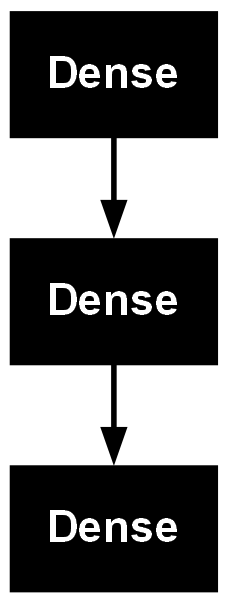

In [10]:
plot_model(model)

In [11]:
model = Sequential([Input(shape=(28,28),name='Input'),
                    Dense(256, activation='relu', name = 'Dense1'),
                    Dense(128, activation='relu', name = 'Dense2'),
                    Dense(10, activation='softmax', name = 'Output')
                    ])

model.summary()
plot_model(model)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense1 (Dense)                  │ (None, 28, 256)        │         7,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 28, 128)        │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 28, 10)         │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,610 (162.54 KB)

 Trainable params: 41,610 (162.54 KB)

 Non-trainable params: 0 (0.00 B)

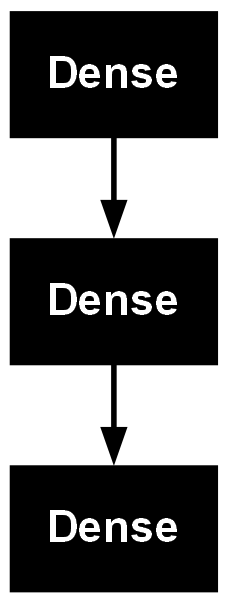

In [13]:
plot_model(model)

In [17]:
inputs = Input(shape=(28,28))
x = Flatten(input_dim=28)(inputs)
x =  Dense(256, activation='relu', name = 'Dense1')(x)
x =  Dense(128, activation='relu', name = 'Dense2')(x)
x =  Dense(10, activation='softmax', name = 'Output')(x)
model = Model(inputs=inputs, outputs=x)
model.summary()

c:\Users\humming\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras.layers import Concatenate
input_layer = Input(shape=(28,28), name='Input Layer')
# x = Flatten(input_dim=28)(inputs)
hidden1 =  Dense(128, activation='relu')(input_layer)
hidden2 =  Dense(32, activation='relu')(hidden1)

concat = Concatenate()([input_layer,hidden2])
output = Dense(1)(concat)
model = Model(inputs=[input_layer], outputs=[output])
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input Layer         │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 28, 128)   │      3,712 │ Input Layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 28, 32)    │      4,128 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 28, 60)    │          0 │ Input             │
│ (Concatenate)       │                   │            │ Layer[0][0],      │
│                     │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 28, 1)     │         61 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,901 (30.86 KB)

 Trainable params: 7,901 (30.86 KB)

 Non-trainable params: 0 (0.00 B)

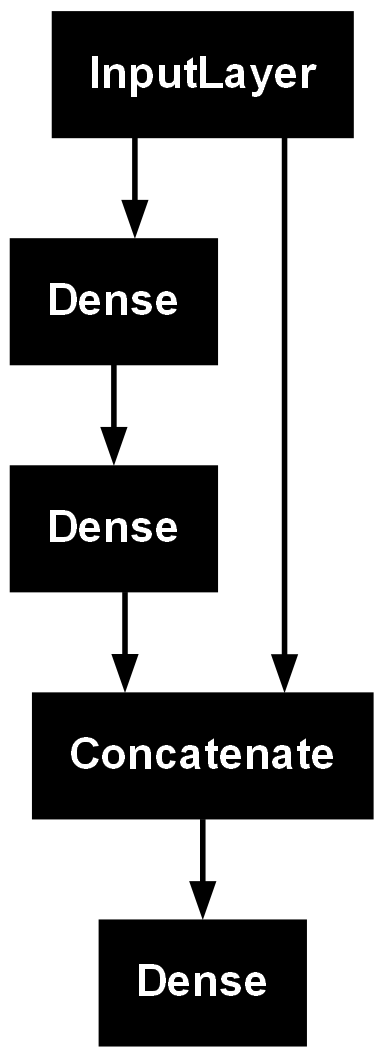

In [19]:
plot_model(model)

In [25]:
input1 = Input(shape= (10,10), name='input1')
input2 = Input(shape= (10, 28), name='input2')
hidden1 =  Dense(128, activation='relu')(input2)
hidden2 =  Dense(32, activation='relu')(hidden1)

concat = Concatenate()([input1,hidden2])
output = Dense(1, activation='sigmoid')(concat)
model = Model(inputs=[input_layer], outputs=[output])
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input2 (InputLayer) │ (None, 10, 28)    │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 10, 128)   │      3,712 │ input2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input1 (InputLayer) │ (None, 10, 10)    │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 10, 32)    │      4,128 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 10, 42)    │          0 │ input1[0][0],     │
│ (Concatenate)       │                   │            │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Input Layer         │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 10, 1)     │         43 │ concatenate_5[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,883 (30.79 KB)

 Trainable params: 7,883 (30.79 KB)

 Non-trainable params: 0 (0.00 B)

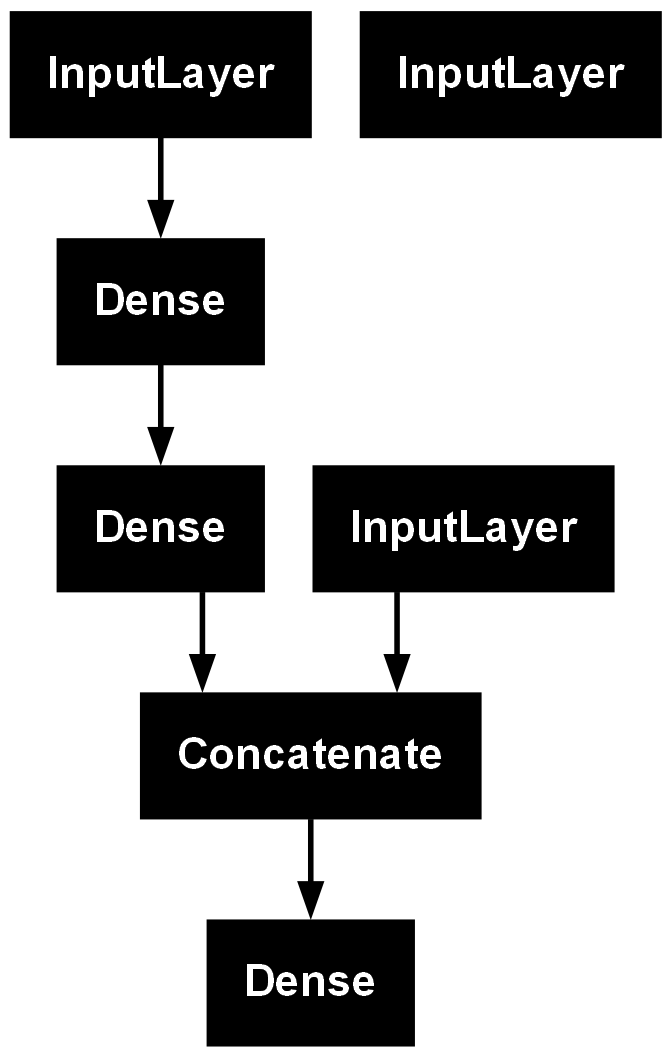

In [26]:
plot_model(model)

In [29]:
input1 = Input(shape= (10,10), name='Input1')
# input2 = Input(shape= (10, 10), name='Input2')
hidden1 =  Dense(128, activation='relu')(input1)
hidden2 =  Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)

sub_output = Dense(1,name = 'sub_output')(hidden2)
model = Model(inputs=[input1], outputs=[output, sub_output])
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input1 (InputLayer) │ (None, 10, 10)    │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 10, 128)   │      1,408 │ Input1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 10, 10)    │      1,290 │ dense_19[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 10, 1)     │         11 │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sub_output (Dense)  │ (None, 10, 1)     │         11 │ dense_20[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,720 (10.62 KB)

 Trainable params: 2,720 (10.62 KB)

 Non-trainable params: 0 (0.00 B)

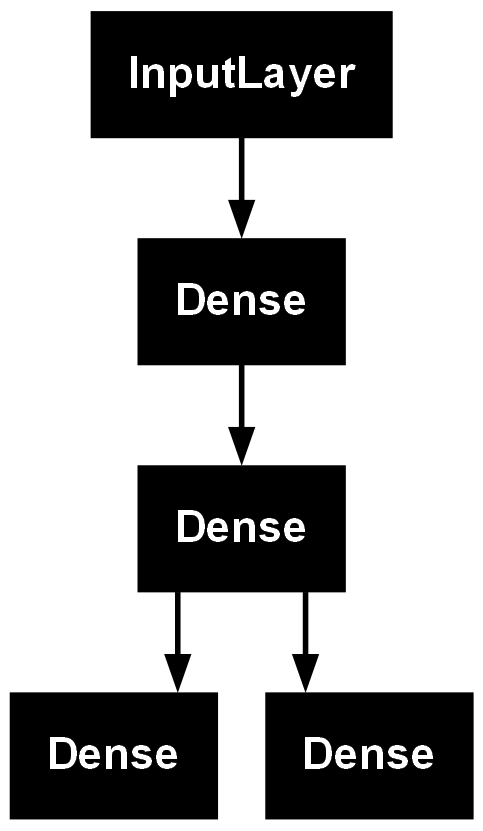

In [30]:
plot_model(model)

In [36]:
input1 = Input(shape= (10,10), name='input1')
input2 = Input(shape= (10, 28), name='input2')
hidden1 =  Dense(128, activation='relu')(input2)
hidden2 =  Dense(16, activation='relu')(hidden1)
concat = Concatenate()([input1,hidden2])
output = Dense(1, activation='sigmoid')(hidden2)
sub_output=Dense(1)(concat)
model = Model(inputs=[input1, input2], outputs=[output, sub_output])

model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input2 (InputLayer) │ (None, 10, 28)    │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_38 (Dense)    │ (None, 10, 128)   │      3,712 │ input2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_39 (Dense)    │ (None, 10, 16)    │      2,064 │ dense_38[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input1 (InputLayer) │ (None, 10, 10)    │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_10      │ (None, 10, 26)    │          0 │ input1[0][0],     │
│ (Concatenate)       │                   │            │ dense_39[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_40 (Dense)    │ (None, 10, 1)     │         17 │ dense_39[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_41 (Dense)    │ (None, 10, 1)     │         27 │ concatenate_10[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,820 (22.73 KB)

 Trainable params: 5,820 (22.73 KB)

 Non-trainable params: 0 (0.00 B)

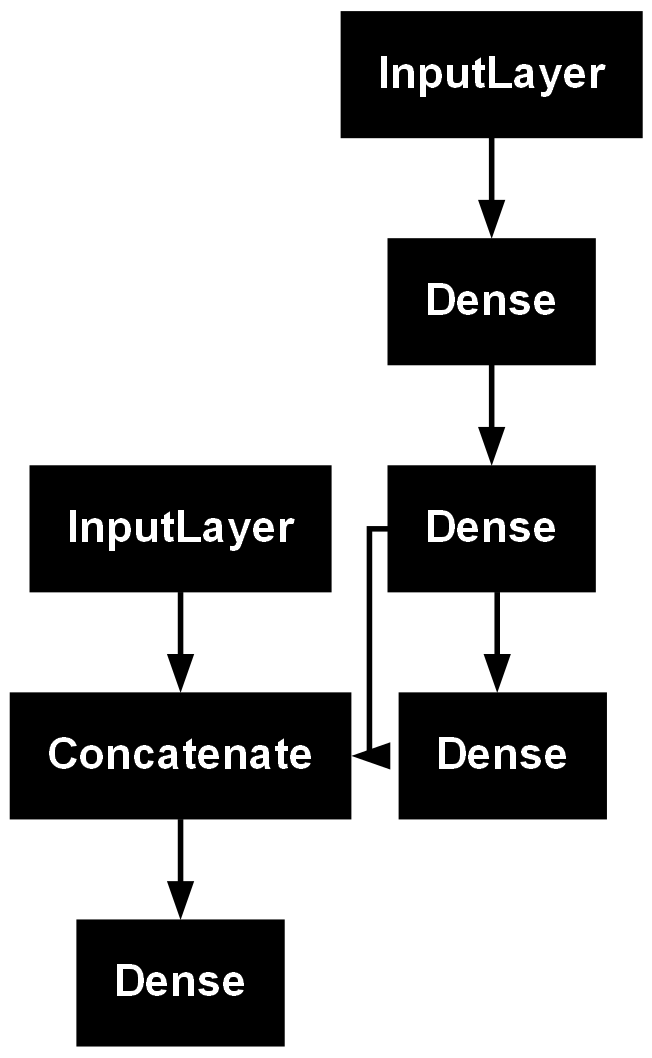

In [37]:
plot_model(model)

In [ ]:

model.fit(훈련용_data, 훈련용_target, epochs=20, batch_size=64, validation_split=0.2) #학습
loss, accuracy=model.evaluate(테스트용_data, 테스트용_target)
print(loss, accuracy)
model.predict(임의의 데이터)
from tensorflow.keras.models import ModelC
checkpoint = ModelCheckpoint('best.keras', save_best_only=True, monitor = 'val_loss', mode='min')
model.load_weights('best.keras')

In [280]:
import pandas as pd
src_data = pd.read_csv("C:/Users/humming/Downloads/0828 코드/와인.csv", encoding='cp949')
data = src_data.drop('종류', axis=1)
target = src_data['종류']

In [288]:
target.value_counts()
target = pd.get_dummies(src_data['종류']).astype(int)

In [290]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import ModelCheckpoint

# Checkpoint 설정
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

# 데이터 분할
훈련용_data, 테스트용_data, 훈련용_target, 테스트용_target = train_test_split(data, target, test_size=0.1, random_state=40)

# 모델 구성
model = Sequential([
    Input(shape=(3,)),                       # 입력 레이어, 입력 크기 (3,)
    BatchNormalization(),                    # 배치 정규화
    Dense(64, activation='gelu', name='D1'), # 첫 번째 Dense 레이어
    BatchNormalization(),                    # 배치 정규화
    Dense(64, activation='gelu', name='D2'), # 두 번째 Dense 레이어
    Dropout(rate=0.3),                       # 드롭아웃 레이어 (과적합 방지)
    Dense(32, activation='gelu', name='D3'), # 세 번째 Dense 레이어
    BatchNormalization(),                    # 배치 정규화
    Dense(32, activation='gelu', name='D4'), # 네 번째 Dense 레이어
    Dropout(rate=0.3),                       # 드롭아웃 레이어
    Dense(2, activation='sigmoid')           # 출력 레이어 (이진 분류용 시그모이드 활성화 함수)
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.01), loss='class_crossentropy', metrics=['accuracy', Precision(), Recall()])

# 모델 학습
model.fit(훈련용_data, 훈련용_target, epochs=100, batch_size=16, validation_data=(테스트용_data, 테스트용_target), callbacks=[checkpoint])


Epoch 1/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7831 - loss: 0.4598 - precision_46: 0.7806 - recall_46: 0.7801 - val_accuracy: 0.8400 - val_loss: 0.4085 - val_precision_46: 0.8382 - val_recall_46: 0.8446
Epoch 2/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8168 - loss: 0.3937 - precision_46: 0.8158 - recall_46: 0.8204 - val_accuracy: 0.7923 - val_loss: 0.4082 - val_precision_46: 0.7935 - val_recall_46: 0.7923
Epoch 3/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8316 - loss: 0.3801 - precision_46: 0.8317 - recall_46: 0.8290 - val_accuracy: 0.8138 - val_loss: 0.4547 - val_precision_46: 0.8138 - val_recall_46: 0.8138
Epoch 4/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8206 - loss: 0.3876 - precision_46: 0.8203 - recall_46: 0.8203 - val_accuracy: 0.8692 - val_loss: 0.3617 - val_precision_46: 0.8692 - val_recall_46: 0.8692
Epoch 5/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8260 - loss: 0.3884 - precision_46: 0.825

In [291]:
result= model.evaluate(테스트용_data,  테스트용_target)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8255 - loss: 0.3691 - precision_46: 0.8255 - recall_46: 0.8255 


In [292]:
pred= model.predict(테스트용_data)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [248]:
pred=model.predict(테스트용_data)



21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [294]:
preds = (pred > 0.5).astype(int)

In [295]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
report = classification_report(테스트용_target,preds)
print(report)

              precision    recall  f1-score   support

           0       0.64      0.72      0.68       152
           1       0.91      0.87      0.89       498

   micro avg       0.84      0.84      0.84       650
   macro avg       0.77      0.80      0.78       650
weighted avg       0.85      0.84      0.84       650
 samples avg       0.84      0.84      0.84       650



In [299]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 예시 데이터셋을 불러오는 함수 (여기서는 사용자가 데이터를 준비해야 함)
def load_data(image_dir, mask_dir):
    images = []
    masks = []
    for filename in os.listdir(image_dir):
        img = tf.keras.preprocessing.image.load_img(os.path.join(image_dir, filename))
        img = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img)
        
        mask = tf.keras.preprocessing.image.load_img(os.path.join(mask_dir, filename), color_mode="grayscale")
        mask = tf.keras.preprocessing.image.img_to_array(mask)
        masks.append(mask)
        
    return np.array(images), np.array(masks)

# 예시로 데이터셋을 나눔
images, masks = load_data('cnn\\images', 'cnn\\masks')

x_train, x_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)


[[[[175. 242. 255.]
   [175. 247. 255.]
   [174. 252. 255.]
   ...
   [191. 237. 255.]
   [190. 241. 255.]
   [204. 223. 255.]]

  [[189. 225. 230.]
   [199. 217. 229.]
   [207. 213. 226.]
   ...
   [208. 222. 235.]
   [209. 219. 226.]
   [214. 212. 237.]]

  [[199. 211. 184.]
   [202. 211. 182.]
   [202. 214. 182.]
   ...
   [209. 209. 186.]
   [208. 215. 195.]
   [205. 218. 200.]]

  ...

  [[209. 186. 174.]
   [204. 195. 170.]
   [197. 199. 179.]
   ...
   [197. 190. 168.]
   [195. 191. 171.]
   [194. 192. 175.]]

  [[215. 183. 171.]
   [206. 196. 164.]
   [196. 198. 175.]
   ...
   [196. 189. 167.]
   [197. 185. 172.]
   [193. 195. 172.]]

  [[215. 188. 167.]
   [200. 199. 164.]
   [193. 198. 174.]
   ...
   [190. 202. 158.]
   [190. 202. 163.]
   [191. 201. 168.]]]]


ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.